In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
# change the working directory to the location of ReconstructOrder on your machine 
os.chdir('c:\\python\\ReconstructOrder')
from compute.reconstruct import ImgReconstructor

#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
#from matplotlib.patches import Ellipse
#def extents(f):
#  delta = f[1] - f[0]
#  return [f[0] - delta/2, f[-1] + delta/2]


# Forward model: specimen -> Intensity

## Specimen properties

### Case 1: retardance varies from 0 to full-wave

In [20]:
# coordinate grid
x = np.linspace(-1.5,1.5,1024)
xx, yy = np.meshgrid(x,x)

# retardance: increases from 0 to full-wave (2pi) over radius of 1, and then stays constant
retardance = 2*np.pi*np.sqrt(xx**2+yy**2)
retardance[retardance >2*np.pi] = 2*np.pi


# slowaxis assumed to rotate azimuthally. 
slowaxis = np.arctan2(yy,xx)%np.pi


# constant transmission and polarization
transmission=np.ones(xx.shape)
polarization=np.ones(xx.shape)

### Case 2: retardance constant at half-wave

In [83]:
# coordinate grid

x = np.linspace(-1.5,1.5,1024)
xx, yy = np.meshgrid(x,x)

# retardance: increases from 0 to full-wave (2pi) over radius of 1, and then stays constant
retardance = np.pi*np.ones(xx.shape)


# slowaxis assumed to rotate azimuthally. 
slowaxis = np.arctan2(yy,xx)%np.pi


# constant transmission and polarization
transmission=np.ones(xx.shape)
polarization=np.ones(xx.shape)

### Case 3: retardance constant at quarter-wave 

In [96]:
# coordinate grid

x = np.linspace(-1.5,1.5,1024)
xx, yy = np.meshgrid(x,x)

# retardance: increases from 0 to full-wave (2pi) over radius of 1, and then stays constant
retardance = 0.5*np.pi*np.ones(xx.shape)


# slowaxis assumed to rotate azimuthally. 
slowaxis = np.arctan2(yy,xx)%np.pi


# constant transmission and polarization
transmission=np.ones(xx.shape)
polarization=np.ones(xx.shape)

### Plot retardance, slow-axis, transmission, and polarization

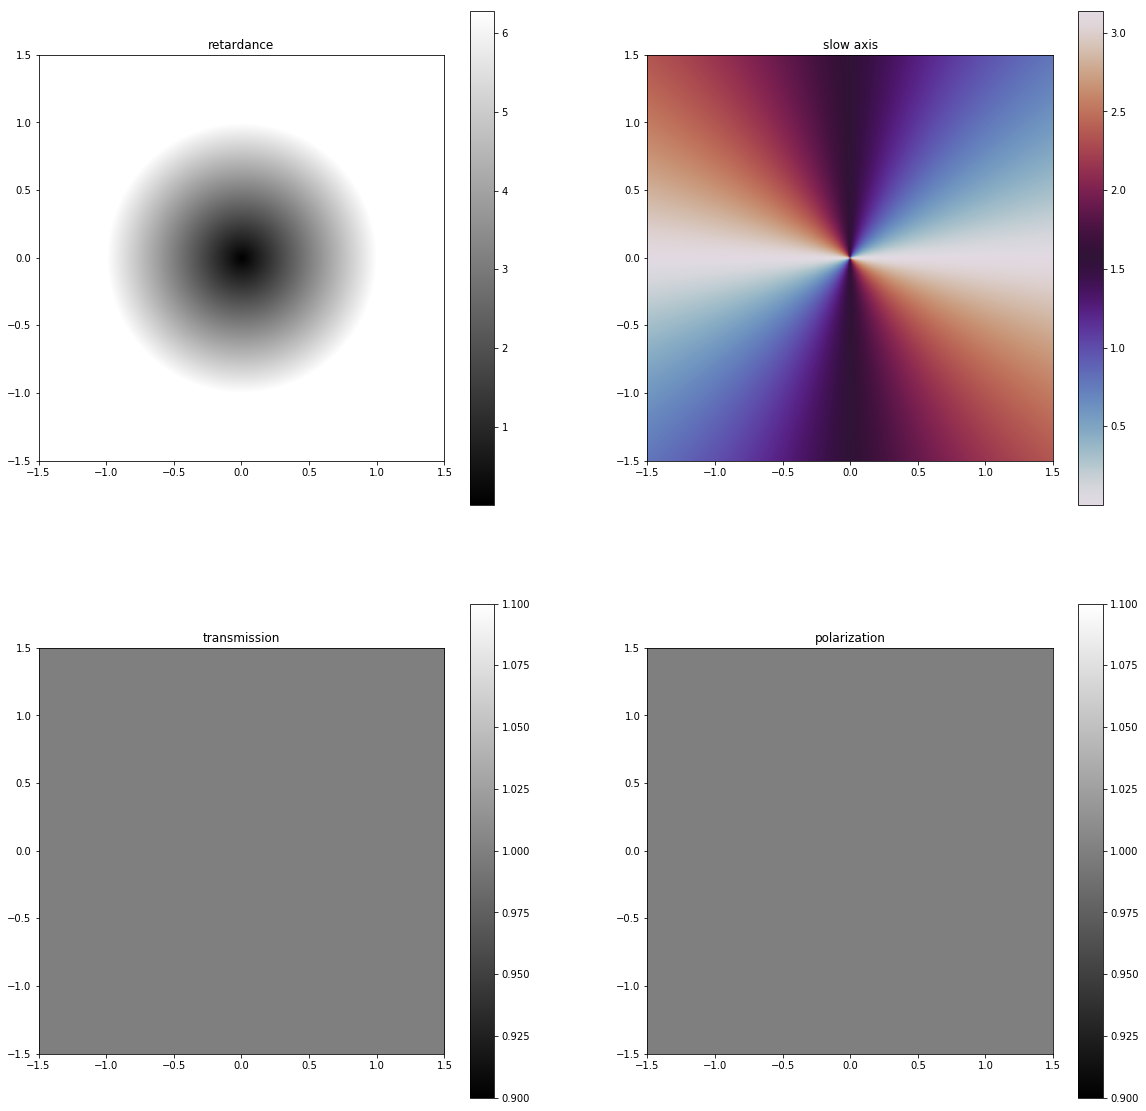

In [21]:
xyextent=[-1.5,1.5,-1.5,1.5]

fig1 = plt.figure(figsize=(20,20)) # create a figure with the default size 

ax1 = fig1.add_subplot(2,2,1) 
im=plt.imshow(retardance,cmap='gray',extent=xyextent, origin='lower');
plt.title('retardance')
ax1.figure.colorbar(im);

ax2=fig1.add_subplot(2,2,2)
im=plt.imshow(slowaxis,cmap='twilight', extent=xyextent, origin='lower'); # Need to adapt this look up table to represent orientation.
plt.title('slow axis')
ax2.figure.colorbar(im);

ax3=fig1.add_subplot(2,2,3)
im=plt.imshow(transmission,cmap='gray',extent=xyextent, origin='lower');
plt.title('transmission')
ax3.figure.colorbar(im);

ax4=fig1.add_subplot(2,2,4)
im=plt.imshow(polarization,cmap='gray',extent=xyextent, origin='lower');
plt.title('polarization')
ax4.figure.colorbar(im);


## Stokes parameters with right circularly polarized illumination

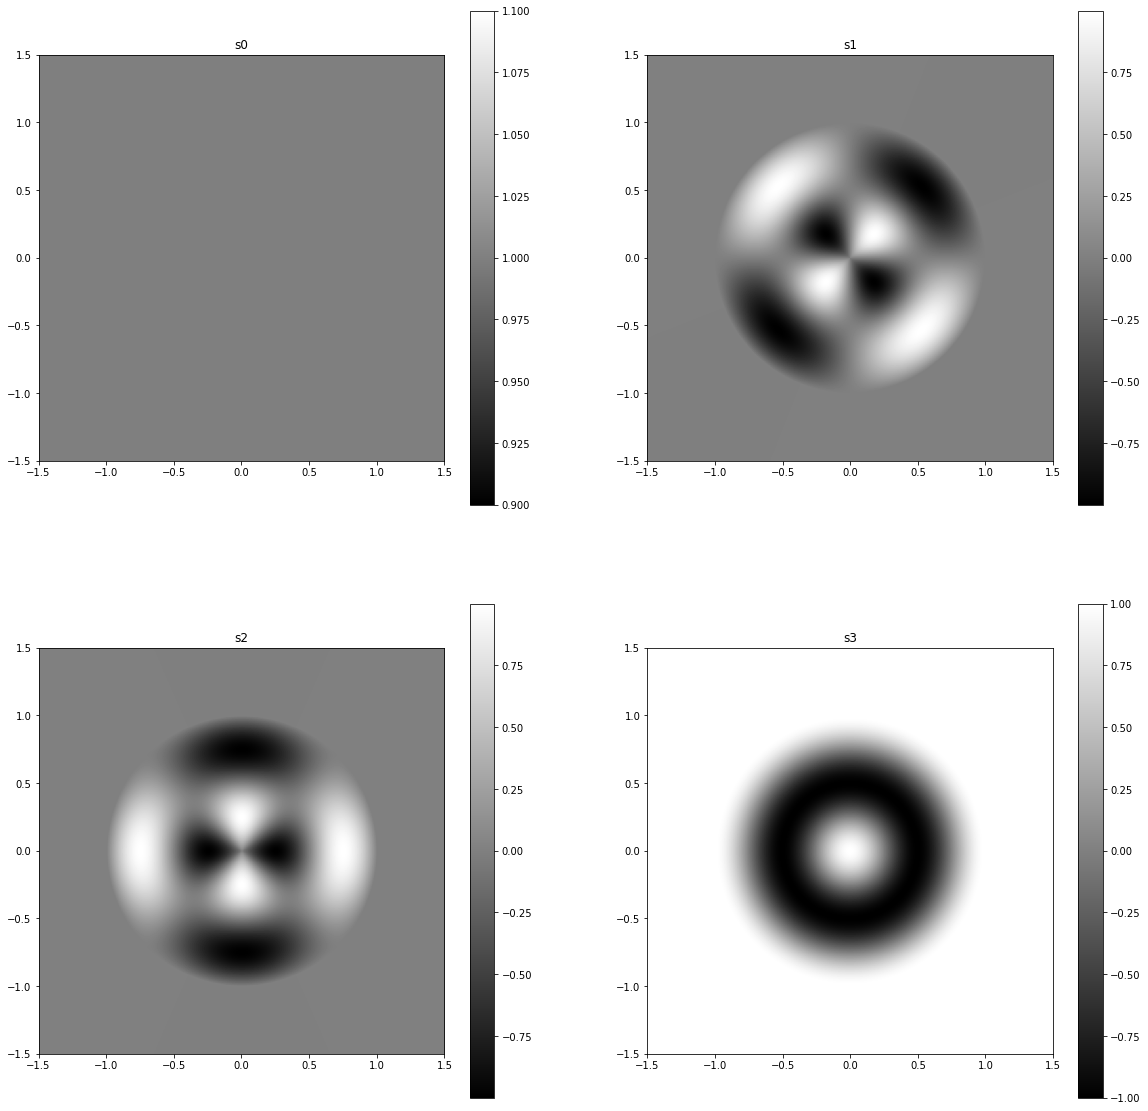

In [22]:
# Assumptions: right circularly polarized input. 
s0=transmission
s1=transmission*polarization*np.sin(2*slowaxis)*np.sin(retardance)
s2=-transmission*polarization*np.cos(2*slowaxis)*np.sin(retardance)
s3=transmission*polarization*np.cos(retardance)

fig2 = plt.figure(figsize=(20,20)) # create a figure with the default size 

ax1 = fig2.add_subplot(2,2,1) 
im=plt.imshow(s0,cmap='gray',extent=xyextent, origin='lower');
plt.title('s0')
ax1.figure.colorbar(im);

ax2=fig2.add_subplot(2,2,2)
im=plt.imshow(s1,cmap='gray',extent=xyextent, origin='lower'); # Need to adapt this look up table to represent orientation.
plt.title('s1')
ax2.figure.colorbar(im);

ax3=fig2.add_subplot(2,2,3)
im=plt.imshow(s2,cmap='gray',extent=xyextent, origin='lower');
plt.title('s2')
ax3.figure.colorbar(im);

ax4=fig2.add_subplot(2,2,4)
im=plt.imshow(s3,cmap='gray',extent=xyextent, origin='lower');
plt.title('s3')
ax4.figure.colorbar(im);

## Intensity images

In [23]:
height,width=s0.shape
s=np.zeros((4,height,width))
s[0,:,:]=s0;  s[1,:,:]=s1; s[2,:,:]=s2; s[3,:,:]=s3;

"""
Swing of 0.25 or quarter-wave leads to linear analysis states. 
Since S1=I0-I90 and S2=I45-I135, the intensity patterns generated by 
"""
swing = 0.25
chi=2*np.pi*swing
StoIMatLC=np.array([ [1, 0, 0, -1],
                     [1, np.sin(chi), 0, -np.cos(chi)],
                     [1, 0, np.sin(chi), -np.cos(chi)],
                     [1, -np.sin(chi), 0, -np.cos(chi)],
                     [1, 0, -np.sin(chi), -np.cos(chi)]])
Svec=s.reshape(4,height*width)
Ivec=np.dot(StoIMatLC,Svec)
I=Ivec.reshape(5,height,width)
Iext=I[0,:,:]; I0=I[1,:,:]; I45=I[2,:,:]; I90=I[3,:,:]; I135=I[4,:,:];

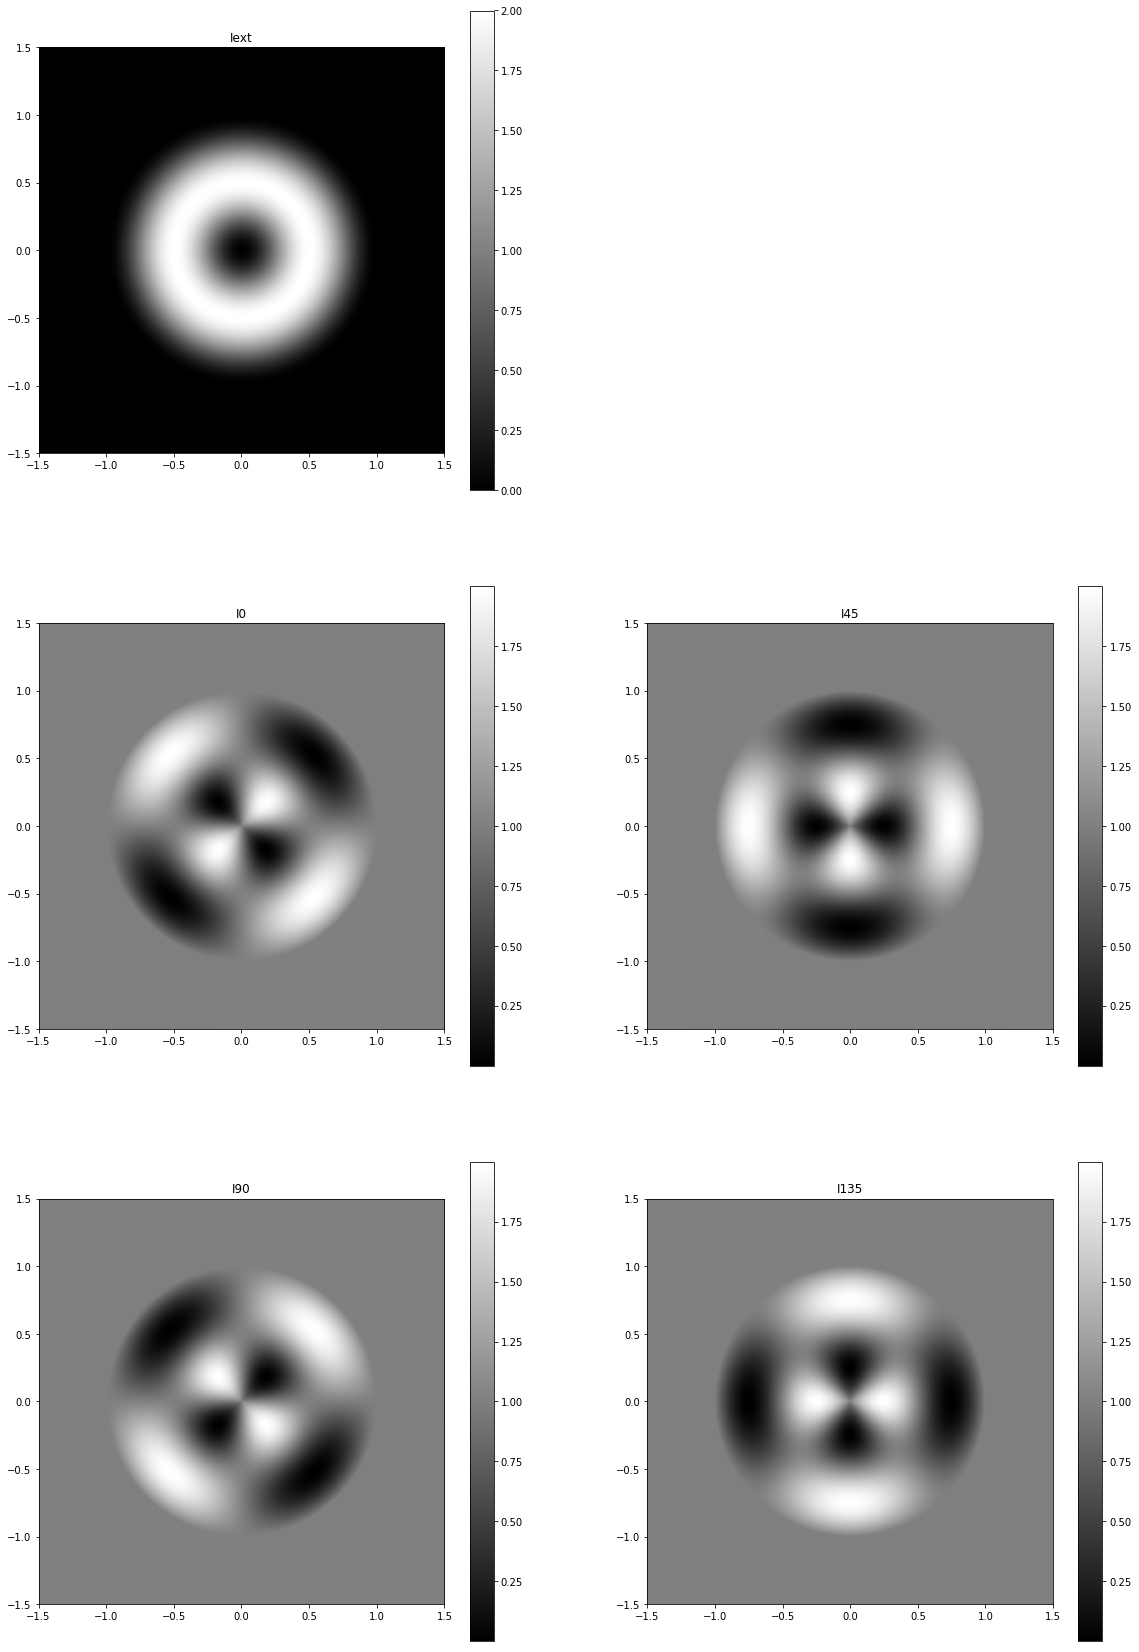

In [24]:
fig3 = plt.figure(figsize=(20,30)) # create a figure with the default size

ax1 = fig3.add_subplot(3,2,1) 
im=plt.imshow(Iext,cmap='gray',extent=xyextent,origin='lower');
plt.title('Iext')
ax1.figure.colorbar(im);

ax2=fig3.add_subplot(3,2,3)
im=plt.imshow(I0,cmap='gray',extent=xyextent,origin='lower'); # Need to adapt this look up table to represent orientation.
plt.title('I0')
ax2.figure.colorbar(im);

ax3=fig3.add_subplot(3,2,4)
im=plt.imshow(I45,cmap='gray',extent=xyextent,origin='lower');
plt.title('I45')
ax3.figure.colorbar(im);

ax4=fig3.add_subplot(3,2,5)
im=plt.imshow(I90,cmap='gray',extent=xyextent,origin='lower');
plt.title('I90')
ax4.figure.colorbar(im);

ax5=fig3.add_subplot(3,2,6)
im=plt.imshow(I135,cmap='gray',extent=xyextent,origin='lower');
plt.title('I135')
ax4.figure.colorbar(im);

In [27]:
wavelength = 2 * np.pi
circularity = 'rcp'
img_reconstructor = ImgReconstructor(I, bg_method='Global', swing=swing,
                                         wavelength=wavelength)

s = img_reconstructor.compute_stokes(I)
        
[transmission, retardance, slowaxis, polarization] = img_reconstructor.reconstruct_birefringence(
                                                            s, stokes_param_bg=None, circularity=circularity)                                                                                                                            
[s0, s1, s2, s3] = s


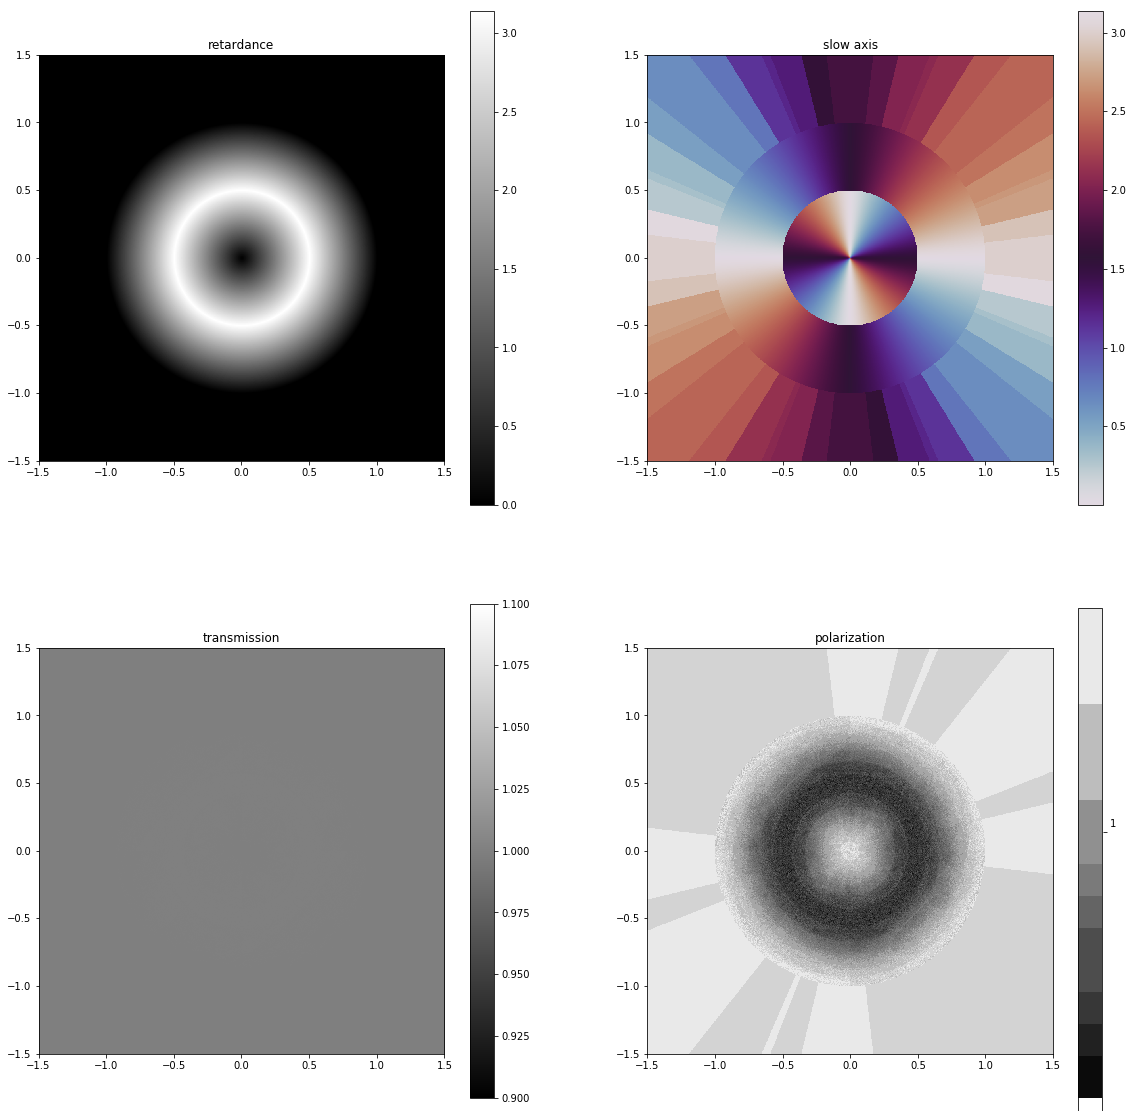

In [28]:
xyextent=[-1.5,1.5,-1.5,1.5]

fig1 = plt.figure(figsize=(20,20)) # create a figure with the default size 

ax1 = fig1.add_subplot(2,2,1) 
im=plt.imshow(retardance,cmap='gray',extent=xyextent, origin='lower');
plt.title('retardance')
ax1.figure.colorbar(im);

ax2=fig1.add_subplot(2,2,2)
im=plt.imshow(slowaxis,cmap='twilight', extent=xyextent, origin='lower'); # Need to adapt this look up table to represent orientation.
plt.title('slow axis')
ax2.figure.colorbar(im);

ax3=fig1.add_subplot(2,2,3)
im=plt.imshow(transmission,cmap='gray',extent=xyextent, origin='lower');
plt.title('transmission')
ax3.figure.colorbar(im);

ax4=fig1.add_subplot(2,2,4)
im=plt.imshow(polarization,cmap='gray',extent=xyextent, origin='lower');
plt.title('polarization')
ax4.figure.colorbar(im);


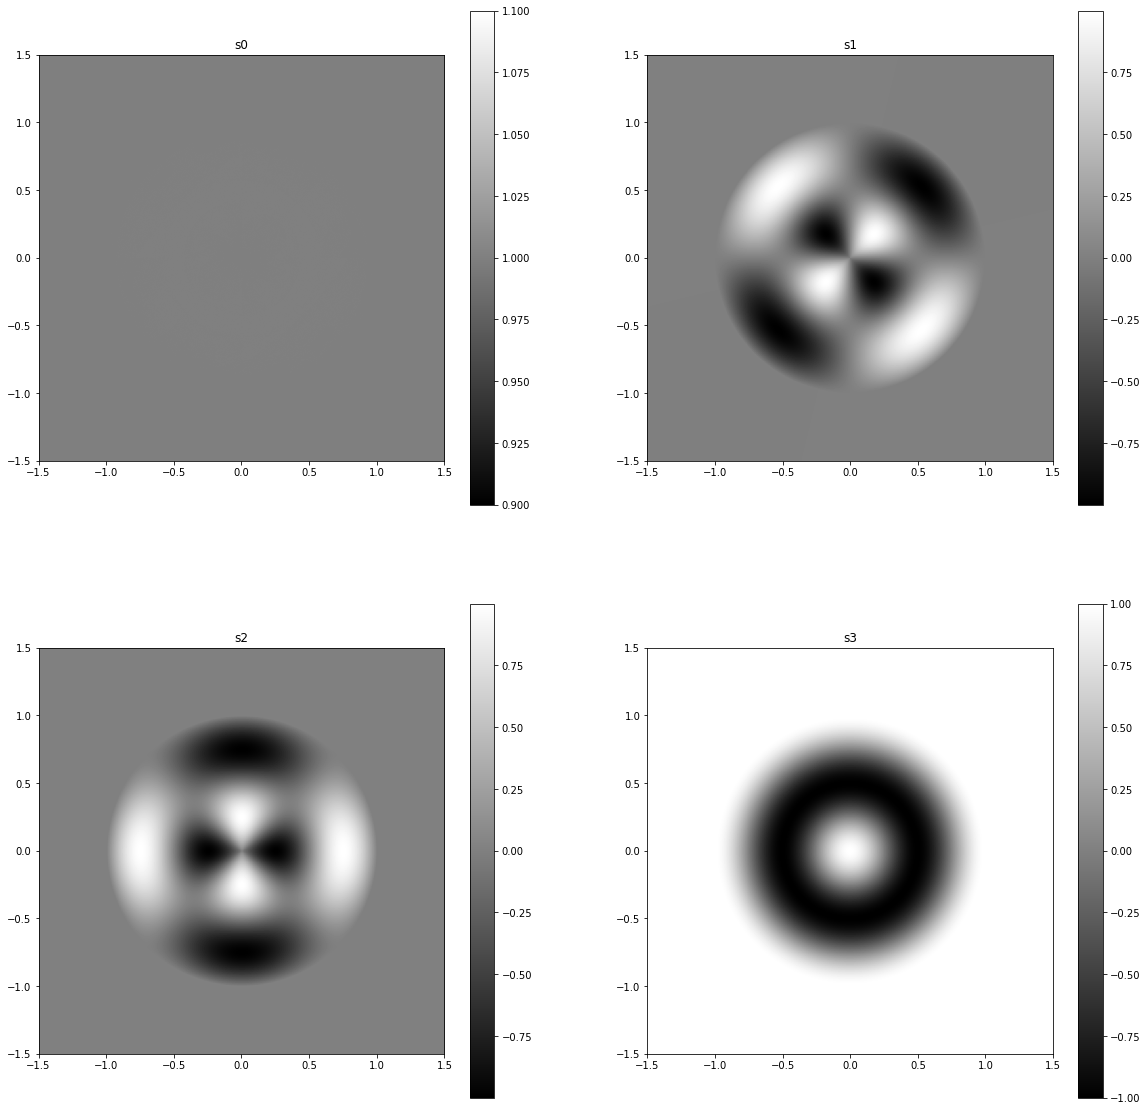

In [29]:
fig2 = plt.figure(figsize=(20,20)) # create a figure with the default size 

ax1 = fig2.add_subplot(2,2,1) 
im=plt.imshow(s0,cmap='gray',extent=xyextent, origin='lower');
plt.title('s0')
ax1.figure.colorbar(im);

ax2=fig2.add_subplot(2,2,2)
im=plt.imshow(s1,cmap='gray',extent=xyextent, origin='lower'); # Need to adapt this look up table to represent orientation.
plt.title('s1')
ax2.figure.colorbar(im);

ax3=fig2.add_subplot(2,2,3)
im=plt.imshow(s2,cmap='gray',extent=xyextent, origin='lower');
plt.title('s2')
ax3.figure.colorbar(im);

ax4=fig2.add_subplot(2,2,4)
im=plt.imshow(s3,cmap='gray',extent=xyextent, origin='lower');
plt.title('s3')
ax4.figure.colorbar(im);

In [30]:
a = [1,1,1,1]
print(StoIMatLC)
print(img_reconstructor.inst_mat_inv)
img_reconstructor.swing
dir(img_reconstructor)
print(np.dot(img_reconstructor.inst_mat_inv, np.dot(StoIMatLC,a)))

print(np.dot(np.linalg.pinv(StoIMatLC), np.dot(StoIMatLC,a)))

[[ 1.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00]
 [ 1.000000e+00  1.000000e+00  0.000000e+00 -6.123234e-17]
 [ 1.000000e+00  0.000000e+00  1.000000e+00 -6.123234e-17]
 [ 1.000000e+00 -1.000000e+00  0.000000e+00 -6.123234e-17]
 [ 1.000000e+00  0.000000e+00 -1.000000e+00 -6.123234e-17]]
[[ 3.69432322e-17  2.50000000e-01  2.50000000e-01  2.50000000e-01
   2.50000000e-01]
 [ 2.84032394e-17  5.00000000e-01 -3.97270863e-17 -5.00000000e-01
  -2.01009306e-17]
 [ 2.84032394e-17  9.70947845e-17  5.00000000e-01  3.82163173e-17
  -5.00000000e-01]
 [-1.00000000e+00  2.50000000e-01  2.50000000e-01  2.50000000e-01
   2.50000000e-01]]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
